In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from keras import Input
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import CSVLogger
from keras.metrics import Recall, Precision


In [2]:
def read_dataset(file_path):
    """ Read the dataset and return the features and encoded classes
    :param file_path: path to the file that contains the dataset
    :type file_path: str
    :return: features and encoded classes
    :rtype: np.array, np.array
    """
    features = []
    classes = []
    with open(file_path) as f:
        _ = f.readline()
        while True:
            line = f.readline().strip()
            if line == '':
                break
            parts = line.split(';')
            features.append(list(map(float, parts[:-1])))
            classes.append(one_hot_encoding(int(parts[-1])))
    return np.array(features), np.array(classes)


def one_hot_encoding(sample):
    """ Encodes the ranking into class (with one-hot encoding)
    bad quality -> [1, 0, 0]
    medium quality -> [0, 1, 0]
    good quality -> [0, 0, 1]
    :param sample: one ranking value
    :type sample: int
    :return: one-hot encoded class
    :rtype: list(int)
    """
    if sample < 6:
        return [1, 0, 0]
    elif sample == 6:
        return [0, 1, 0]
    else:
        return [0, 0, 1]


def plot_graph_loss(file_name, model_name):
    """ Plots validation and train loss
    :param file_name: name of the csv file containing values for validation and train loss functions
    :type file_name: str
    :param model_name: name of the model
    :type model_name: str
    :return: None
    """
    values = pd.read_table(file_name, sep=',')
    data = pd.DataFrame()
    data['epoch'] = list(values['epoch'].to_numpy() + 1) + list(values['epoch'].to_numpy() + 1)
    data['loss name'] = ['training'] * len(values) + ['validation'] * len(values)
    data['loss'] = list(values['loss'].to_numpy()) + list(values['val_loss'].to_numpy())
    sns.set(style='darkgrid', context='poster', font='Verdana')
    _, ax = plt.subplots()
    sns.lineplot(x='epoch', y='loss', hue='loss name', style='loss name', dashes=False, data=data, palette='Set2')
    ax.set_ylabel('Loss')
    ax.set_xlabel('Epoch')
    # ax.legend().texts[0].set_text('')
    plt.title(model_name)
    plt.show()


In [3]:
x, y = read_dataset('winequality-white.csv')
x = MinMaxScaler().fit_transform(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

print('Train set:', x_train.shape, y_train.shape)
print('Test set:', x_test.shape, y_test.shape)


Train set: (3918, 11) (3918, 3)
Test set: (980, 11) (980, 3)


In [4]:
model = Sequential()

model.add(Input(11))

model.add(Dense(32, 'relu'))
model.add(Dense(16, 'relu'))
model.add(Dense(8, 'relu'))
model.add(Dense(3, 'softmax'))


In [5]:
csv = CSVLogger('./model_log.csv')

model.compile('adam', 'categorical_crossentropy', metrics=['accuracy', Precision(), Recall()])
model.fit(x_train, y_train, epochs=200, validation_split=0.125, callbacks=[csv], verbose=False)

model.save('./wine_model.h5')
model.save_weights('./wine_model_weights.h5')


In [6]:
y_prob = model.predict(x_test)
y_pred = np.argmax(y_prob, axis=-1)
y_true = np.array([0 if np.array_equal([1, 0, 0], y) else 1 if np.array_equal([0, 1, 0], y) else 2 for y in y_test])


31/31 [==============================] - 0s 767us/step


In [7]:
print(f'Accuracy: {accuracy_score(y_true, y_pred)}')
print(f'Precision: {precision_score(y_true, y_pred, average="macro")}')
print(f'Recall: {recall_score(y_true, y_pred, average="macro")}')
print(f'F1: {f1_score(y_true, y_pred, average="macro")}')


Accuracy: 0.6122448979591837
Precision: 0.6110701272768025
Recall: 0.6009773844709153
F1: 0.6042696444225127


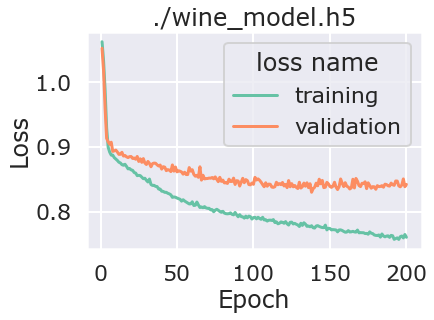

In [8]:
plot_graph_loss('./model_log.csv', './wine_model.h5')


# A.

In [9]:
model_a = Sequential()

model_a.add(Input(11))

model_a.add(Dense(128, 'relu'))
model_a.add(Dense(64, 'relu'))
model_a.add(Dense(32, 'relu'))
model_a.add(Dense(3, 'softmax'))

In [10]:
csv_a = CSVLogger('./model_log_a.csv')

model_a.compile('adam', 'categorical_crossentropy', metrics=['accuracy', Precision(), Recall()])
model_a.fit(x_train, y_train, epochs=200, validation_split=0.125, callbacks=[csv_a], verbose=False)

model_a.save('./wine_model_a.h5')
model_a.save_weights('./wine_model_weights_a.h5')


In [11]:
y_prob_a = model.predict(x_test)
y_pred_a = np.argmax(y_prob_a, axis=-1)


31/31 [==============================] - 0s 733us/step


In [12]:
print(f'Accuracy: {accuracy_score(y_true, y_pred_a)}')
print(f'Precision: {precision_score(y_true, y_pred_a, average="macro")}')
print(f'Recall: {recall_score(y_true, y_pred_a, average="macro")}')
print(f'F1: {f1_score(y_true, y_pred_a, average="macro")}')


Accuracy: 0.6122448979591837
Precision: 0.6110701272768025
Recall: 0.6009773844709153
F1: 0.6042696444225127


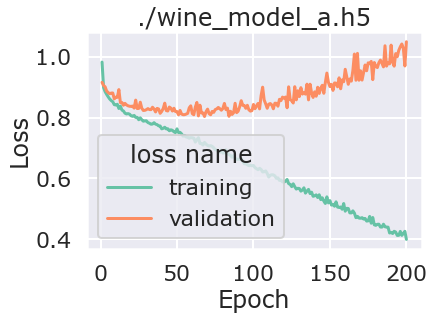

In [13]:
plot_graph_loss('./model_log_a.csv', './wine_model_a.h5')


# B.

In [14]:
model_b = Sequential()

model_b.add(Input(11))

model_b.add(Dense(32, 'relu'))
model_b.add(Dense(16, 'relu'))
model_b.add(Dense(8, 'relu'))
model_b.add(Dense(8, 'relu'))
model_b.add(Dense(64, 'relu'))
model_b.add(Dense(32, 'relu'))
model_b.add(Dense(16, 'relu'))
model_b.add(Dense(3, 'softmax'))

In [15]:
csv_b = CSVLogger('./model_log_b.csv')

model_b.compile('adam', 'categorical_crossentropy', metrics=['accuracy', Precision(), Recall()])
model_b.fit(x_train, y_train, epochs=200, validation_split=0.125, callbacks=[csv_b], verbose=False)

model_b.save('./wine_model_b.h5')
model_b.save_weights('./wine_model_weights_b.h5')


In [16]:
y_prob_b = model.predict(x_test)
y_pred_b = np.argmax(y_prob_b, axis=-1)


31/31 [==============================] - 0s 667us/step


In [17]:
print(f'Accuracy: {accuracy_score(y_true, y_pred_b)}')
print(f'Precision: {precision_score(y_true, y_pred_b, average="macro")}')
print(f'Recall: {recall_score(y_true, y_pred_b, average="macro")}')
print(f'F1: {f1_score(y_true, y_pred_b, average="macro")}')


Accuracy: 0.6122448979591837
Precision: 0.6110701272768025
Recall: 0.6009773844709153
F1: 0.6042696444225127


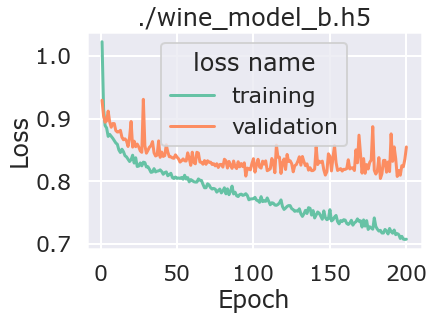

In [18]:
plot_graph_loss('./model_log_b.csv', './wine_model_b.h5')


# C.

In [19]:
model_c = Sequential()

model_c.add(Input(11))

model_c.add(Dropout(0.25))
model_c.add(Dense(32, 'relu'))
model_c.add(Dropout(0.25))
model_c.add(Dense(16, 'relu'))
model_c.add(Dropout(0.25))
model_c.add(Dense(8, 'relu'))
model_c.add(Dropout(0.25))
model_c.add(Dense(3, 'softmax'))


In [20]:
csv_c = CSVLogger('./model_log_c.csv')

model_c.compile('adam', 'categorical_crossentropy', metrics=['accuracy', Precision(), Recall()])
model_c.fit(x_train, y_train, epochs=200, validation_split=0.125, callbacks=[csv_c], verbose=False)

model_c.save('./wine_model_c.h5')
model_c.save_weights('./wine_model_weights_c.h5')


In [21]:
y_prob_c = model.predict(x_test)
y_pred_c = np.argmax(y_prob_c, axis=-1)


31/31 [==============================] - 0s 800us/step


In [22]:
print(f'Accuracy: {accuracy_score(y_true, y_pred_c)}')
print(f'Precision: {precision_score(y_true, y_pred_c, average="macro")}')
print(f'Recall: {recall_score(y_true, y_pred_c, average="macro")}')
print(f'F1: {f1_score(y_true, y_pred_c, average="macro")}')


Accuracy: 0.6122448979591837
Precision: 0.6110701272768025
Recall: 0.6009773844709153
F1: 0.6042696444225127


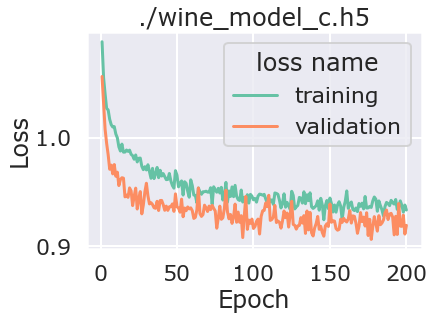

In [23]:
plot_graph_loss('./model_log_c.csv', './wine_model_c.h5')
